# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

# stratify parameter added to balance classes manually and help overcome evident lack of data 
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35,
                                                stratify=target)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,545,88,44,84,135,55,12,155,44,20,158,176,351,164,75,7,11,183,195
1,192,93,43,76,149,57,7,149,44,19,143,172,335,176,69,14,0,189,194
2,344,99,55,101,219,68,10,224,30,25,178,228,737,213,74,11,20,187,196
3,533,89,41,63,134,59,6,123,55,17,137,148,223,150,76,12,3,186,188
4,415,101,53,108,184,54,12,216,31,24,172,220,685,187,68,4,24,190,201
5,214,89,36,72,141,56,7,138,48,18,126,163,286,130,72,1,1,187,192
6,780,109,47,96,206,64,9,198,33,23,150,219,586,191,70,4,13,190,198
7,201,90,36,74,171,60,8,157,42,19,128,177,367,123,61,6,21,197,204
8,498,88,36,53,113,57,3,118,57,17,128,137,204,136,88,7,14,180,183
9,829,95,49,82,139,56,11,159,43,20,162,173,365,185,75,7,10,182,191


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,419.313297,93.688525,44.921676,82.377049,169.677596,61.985428,8.701275,168.894353,40.925319,20.577413,148.258652,188.826958,439.976321,174.799636,72.438980,6.546448,12.728597,189.025501,195.750455
std,241.343011,8.362427,6.119794,15.758149,33.744800,8.648223,5.139480,33.184396,7.751140,2.600519,14.440873,31.528361,176.534465,32.332498,7.665117,5.107256,9.029207,6.121883,7.414330
min,0.000000,76.000000,33.000000,40.000000,110.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,182.000000
25%,206.000000,87.000000,40.000000,70.000000,142.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,167.000000,319.000000,151.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,421.000000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,172.000000,71.000000,6.000000,11.000000,188.000000,197.000000
75%,626.000000,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,200.000000,46.000000,23.000000,161.000000,217.000000,598.000000,198.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,842.000000,117.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,186.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
# Remove excessive feature -- indices of objects
X_train = X_train[:,1:] 
X_test = X_test[:,1:]

# No NaN or Null objects, that's why just scip any other preprocessing procedures

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

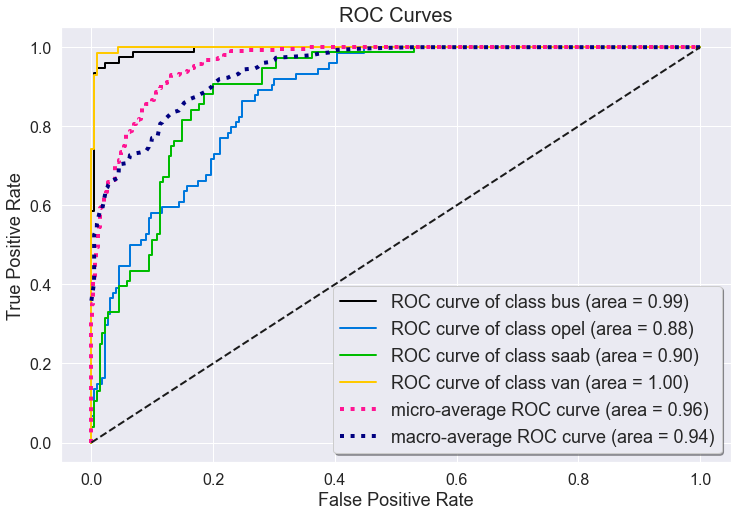

Best parameters:   (C: 23.631285587643085, penalty: l1)
Accuracy on test:           0.8148148148148148
F1-score on test (macro):   0.8153037779709587


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from scikitplot.metrics import plot_roc
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_theme(style='darkgrid')
import warnings
warnings.filterwarnings("ignore")


# set params grid for grid search
parameters_grid = {
    'regressor__penalty': ['l2', 'l1', 'none'],
    'regressor__C': random.sample(list(np.logspace(-1, 1.5, 10000)), 300),
}
# set CV strategy
ss = StratifiedShuffleSplit(n_splits=7, test_size=0.2)

# make model that applies scaling and then trains regression
model = Pipeline([('scaler', StandardScaler()),
                 ('regressor', LogisticRegression(multi_class='multinomial', 
                            solver='saga', tol=1e-3, max_iter=500))])

# define the grid search over model above
grid_search = GridSearchCV(estimator=model,
                          cv=ss,
                          param_grid=parameters_grid,
                          n_jobs=8,
                          scoring="accuracy")
# perform the grid search
grid_search.fit(X_train, y_train)

# capture the results
best_params = grid_search.best_estimator_.get_params()
y_pred_proba = grid_search.predict_proba(X_test)
y_pred_labels = grid_search.predict(X_test)

# plot ROC curve and print the results of CV
plot_roc(y_test, y_pred_proba, figsize=(12,8))
plt.xlim(left=-0.05, right=1.05)
plt.ylim(bottom=-0.05, top=1.05)

plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('ROC Curves', fontsize=20)

plt.legend(shadow = True, fontsize=18, loc='lower right')
plt.show()

best_regr_C = best_params["regressor__C"]
best_regr_penalty = best_params["regressor__penalty"]

print(f'Best parameters:   (C: {best_regr_C}, penalty: {best_regr_penalty})\nAccuracy on test:           {accuracy_score(y_test, y_pred_labels)}\nF1-score on test (macro):   {f1_score(y_test, y_pred_labels, average="macro")}')

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

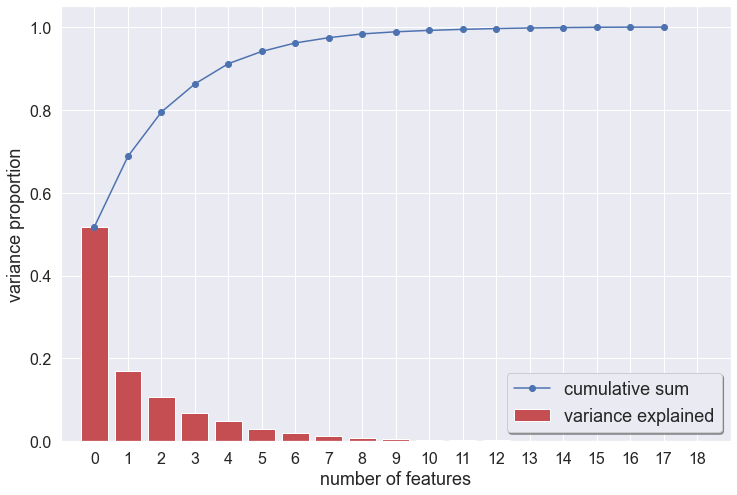

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(StandardScaler().fit_transform(X_train))


n_features = np.arange(0, 18, 1)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(12, 8))

plt.bar(n_features, explained_variance, label='variance explained',
       color=sns.color_palette()[3])
plt.plot(n_features, np.cumsum(explained_variance), marker='o', label='cumulative sum',
       color=sns.color_palette()[0])

plt.xlabel("number of features", fontsize=18)
plt.ylabel("variance proportion", fontsize=18)
plt.xticks(np.arange(0, 19, 1), fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(left=-1, right=19)
plt.ylim(bottom=0, top=1.05)

plt.legend(shadow = True, fontsize=18, loc='lower right')

plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [9]:
np.cumsum(explained_variance)

array([0.51832895, 0.68794087, 0.79506233, 0.86289762, 0.91181795,
       0.94133445, 0.96182742, 0.974496  , 0.98362984, 0.98873539,
       0.99212499, 0.99461266, 0.99655796, 0.99793699, 0.99887126,
       0.99963101, 0.99998019, 1.        ])

Data should definitely be normalized, otherwise variance along biggest scale features will weigh too much comparatively and most variance proportion might be explained by less components than neccessary to save enough information and also by wrong ones to save as much as possible with certain number of components.
To reduce dimensity will choose n_components = 10 as being least number explaning $\sim$99% variance.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

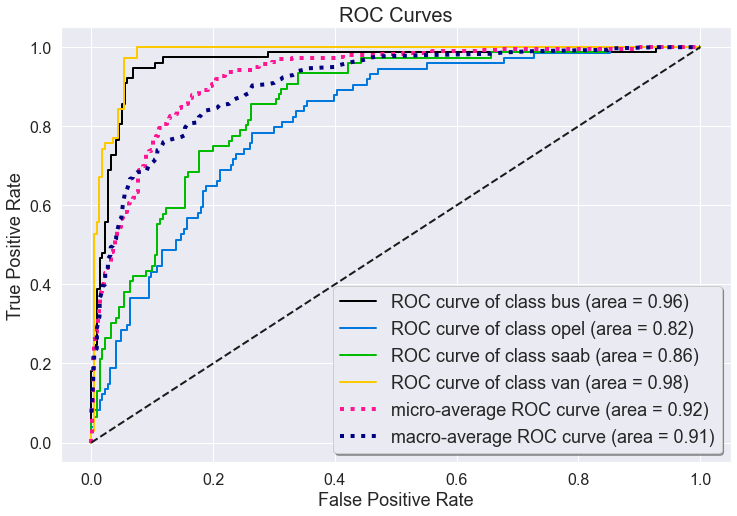

Best parameters:   (C: 0.2853944640091901, penalty: l1)
Accuracy on test:           0.7239057239057239
F1-score on test (macro):   0.7151208994397502


In [10]:
# set params grid for grid search
parameters_grid = {
    'regressor__penalty': ['l2', 'l1', 'none'],
    'regressor__C': random.sample(list(np.logspace(-1, 2, 10000)), 300),
}
# set CV strategy
ss = StratifiedShuffleSplit(n_splits=5, test_size=0.15)

# make model that applies scaling and then trains regression
model_reduced = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=10)),
    ('regressor', LogisticRegression(multi_class='multinomial', 
                            solver='saga', tol=1e-3, max_iter=500))])

# define the grid search over model above
grid_search_reduced = GridSearchCV(estimator=model_reduced,
                          cv=ss,
                          param_grid=parameters_grid,
                          n_jobs=15,
                          scoring="accuracy")
# perform the grid search
grid_search_reduced.fit(X_train, y_train)

# capture the results
best_params_reduced = grid_search_reduced.best_estimator_.get_params()
y_pred_proba_reduced = grid_search_reduced.predict_proba(X_test)
y_pred_labels_reduced = grid_search_reduced.predict(X_test)

# plot ROC curve and print the results of CV
plot_roc(y_test, y_pred_proba_reduced, figsize=(12,8))
plt.xlim(left=-0.05, right=1.05)
plt.ylim(bottom=-0.05, top=1.05)

plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('ROC Curves', fontsize=20)

plt.legend(shadow = True, fontsize=18, loc='lower right')

plt.show()
# print best params and final metrics
print(f'Best parameters:   (C: {best_params_reduced["regressor__C"]}, penalty: {best_params_reduced["regressor__penalty"]})\nAccuracy on test:           {accuracy_score(y_test, y_pred_labels_reduced)}\nF1-score on test (macro):   {f1_score(y_test, y_pred_labels_reduced, average="macro")}')

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

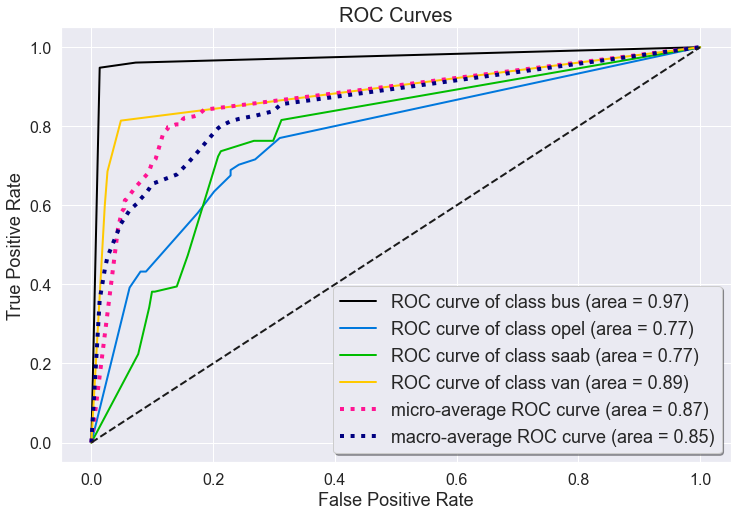

Best parameters:   (max_depth: 7, criterion: log_loss)
Accuracy on test:           0.7037037037037037
F1-score on test(macro):   0.7053533230460524


In [11]:
from sklearn.tree import DecisionTreeClassifier

# set params grid for grid search
parameters_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(1, 9, 1),
    
}
# set CV strategy
ss = StratifiedShuffleSplit(n_splits=10, test_size=0.15)

tree = DecisionTreeClassifier()

# define the grid search over model above

grid_search_tree = GridSearchCV(estimator=tree,
                          cv=ss,
                          param_grid=parameters_grid,
                          n_jobs=8,
                          scoring="accuracy")
# perform the grid search
grid_search_tree.fit(X_train, y_train)

# capture the results
y_pred_proba = grid_search_tree.predict_proba(X_test)
y_pred_labels = grid_search_tree.predict(X_test)

best_params = grid_search_tree.best_estimator_.get_params()

# plot ROC curve and print the results of CV
plot_roc(y_test, y_pred_proba, figsize=(12,8))
plt.xlim(left=-0.05, right=1.05)
plt.ylim(bottom=-0.05, top=1.05)

plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('ROC Curves', fontsize=20)

plt.legend(shadow = True, fontsize=18, loc='lower right')

plt.show()

best_tree_depth = best_params["max_depth"]
best_tree_criterion = best_params["criterion"]

print(f'Best parameters:   (max_depth: {best_tree_depth}, criterion: {best_tree_criterion})\nAccuracy on test:           {accuracy_score(y_test, y_pred_labels)}\nF1-score on test(macro):   {f1_score(y_test, y_pred_labels, average="macro")}')

Such a narrow range af params chosen because train sample size is ~$2^9$ and we operate binary trees, thus with depth $\geq$9 tree is able to perfectly fit train sample which is obviously overfitting, it does not necesserily do it, but it's seamingly no reason to try, because it would be overfitting with such a small dataset anyway. (I actually tried 1-20 range and it didn't help at all)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

For logistic regression optimal number of algorythms with this particular dataset is 1, considering previous results using a single regressor (single regressor performs even better, being trained on the original train sample). Usage of ensemble makes calculations longer and does not notably improve the results according to the plot, however it gradually decreases number to number difference by averaging score from all the estimators, so its more unlikely to accidentally get lower than average score having multipal regressors, but it is not worth the performance drop.

Unlike the regressions, tree classifier metrics benefit significantly from increasing number of estimators to about 10, notably impoves to about 20 and remains almost constant further. Also, random variance significantly decreases with the size of ensemble and considering the computational cheapness of shallow trees I would go for ~100 trees in such a task, but for some cases 20 might be more optimal in terms of time-efficiency.

More accurate investigation could be done with larger dataset, ~500 objects with 18 features can hardly provide us with proper dependencies. 

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

As for a criterion, I couldn't say much for now, but as for the depth, it's pretty clear that for bagging clasiffication single models should be quite complex (unlike the boosting) so we should not probably use too small trees. Moreover, we can use even deeper ones than used in single tree classifier, as the bagging approach helps to dodge overfitting, but I would still avoid using ones that remembers a whole dataset. So, the conclusion is that the optimal depth of a single tree for bagging needs to be found on validation as well as other parameters, but for such a small dataset it's likely to be pretty close to single tree classifier best depth.

In [18]:
from sklearn.utils import resample

avg_k = 100

BR_acc = []
BR_f1 = []
BR_acc_std = []
BR_f1_std = []

BR_probas = []

regressor = LogisticRegression(multi_class='multinomial', C=best_regr_C, 
                               penalty=best_regr_penalty, solver='saga', 
                               tol=1e-3, max_iter=500)
regr = Pipeline([('scaler', StandardScaler()),
                 ('regressor', regressor)])

for i in range(1, 101, 1):
    bootstraped = resample(np.hstack((X_train, y_train[:,None])))
    X_temp = bootstraped[:,:-1]
    y_temp = bootstraped[:,-1]
    
    regr.fit(X_temp, y_temp)
    BR_probas.append(regr.predict_proba(X_test))
    
BR_probas = np.array(BR_probas)

labels_to_ind = ['bus', 'opel', 'saab', 'van']

for i in range(1, 101, 1):
    
    temp_acc = np.zeros(avg_k)
    temp_f1 = np.zeros(avg_k)
    for j in range(avg_k):
        temp_indices = random.sample(list(range(100)), i)

        temp_probas = np.sum(np.stack([BR_probas[ind] for ind in temp_indices], axis=-1), axis=-1)
        temp_preds = temp_probas.argmax(axis=1)
        temp_labels = [labels_to_ind[pr] for pr in temp_preds]

        temp_acc[j] = accuracy_score(y_test, temp_labels)
        temp_f1[j] = f1_score(y_test, temp_labels, average="macro")
    
    # average the scores (NOT probabilities) over different ensembles of the same size to reduce variance on plots 
    # it does not change the performance, but make the results and dependency more visual and less random
    # save stardard deviation to also plot it with scores
    BR_acc.append(temp_acc.mean()) 
    BR_f1.append(temp_f1.mean())
    BR_acc_std.append(temp_acc.std())
    BR_f1_std.append(temp_acc.std())
    

BT_acc = []
BT_f1 = []
BT_acc_std = []
BT_f1_std = []

BT_probas = []

tree = DecisionTreeClassifier(max_depth=best_tree_depth, 
                              criterion=best_tree_criterion)
scaler_BR = StandardScaler()

for i in range(1, 101, 1):
    bootstraped = resample(np.hstack((X_train, y_train[:,None])))
    X_temp = bootstraped[:,:-1]
    y_temp = bootstraped[:,-1]
    
    tree.fit(X_temp, y_temp)
    BT_probas.append(tree.predict_proba(X_test))
    
BT_probas = np.array(BT_probas)

labels_to_ind = ['bus', 'opel', 'saab', 'van']

for i in range(1, 101, 1):
    
    temp_acc = np.zeros(avg_k)
    temp_f1 = np.zeros(avg_k)
    for j in range(avg_k):
        temp_indices = random.sample(list(range(100)), i)

        temp_probas = np.sum(np.stack([BT_probas[ind] for ind in temp_indices], axis=-1), axis=-1)
        temp_preds = temp_probas.argmax(axis=1)
        temp_labels = [labels_to_ind[pr] for pr in temp_preds]

        temp_acc[j] = accuracy_score(y_test, temp_labels)
        temp_f1[j] = f1_score(y_test, temp_labels, average="macro")
        
    # average the scores (NOT probabilities) over different ensembles of the same size to reduce variance on plots 
    # it does not change the performance, but make the results and dependency more visual
    # save stardard deviation to also plot it with scores
    BT_acc.append(temp_acc.mean())
    BT_f1.append(temp_f1.mean())
    BT_acc_std.append(temp_acc.std())
    BT_f1_std.append(temp_acc.std())

BR_acc, BR_f1, BR_acc_std, BR_f1_std = np.array(BR_acc), np.array(BR_f1), np.array(BR_acc_std), np.array(BR_f1_std)
BT_acc, BT_f1, BT_acc_std, BT_f1_std = np.array(BT_acc), np.array(BT_f1), np.array(BT_acc_std), np.array(BT_f1_std)
    
print(f'Best ensemble size:\n  Regr (acc):  {np.array(BR_acc).argmax()}\n  Regr (f1):  {np.array(BR_f1).argmax()}\n  Trees (acc):  {np.array(BT_acc).argmax()}\n  Trees (f1):  {np.array(BT_f1).argmax()}')
print(f'\nBest scores:\n  Accuracy (regr):  {np.array(BR_acc).max()}\n  F1-score (regr):  {np.array(BR_f1).max()}\n  Accuracy (trees):  {np.array(BT_acc).max()}\n  F1-score (trees):  {np.array(BT_f1).max()}')

Best ensemble size:
  Regr (acc):  94
  Regr (f1):  82
  Trees (acc):  29
  Trees (f1):  29

Best scores:
  Accuracy (regr):  0.8048148148148145
  F1-score (regr):  0.8035220392305655
  Accuracy (trees):  0.7589225589225588
  F1-score (trees):  0.7533455403895728


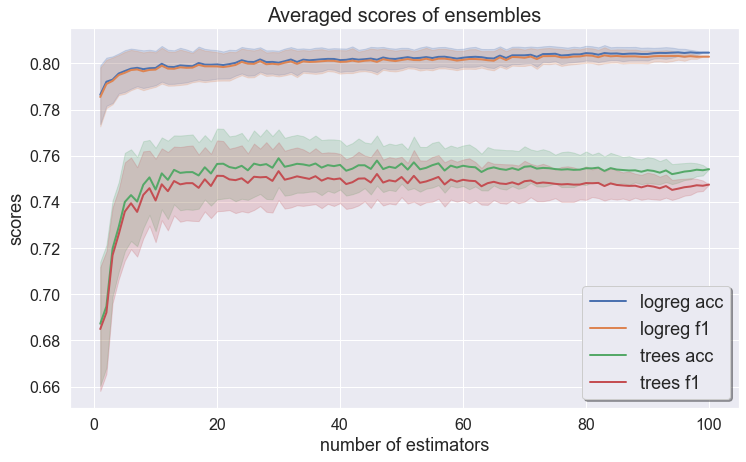

In [19]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(np.arange(1, 101, 1), BR_acc, lw=2, label='logreg acc',
        color=sns.color_palette()[0])
ax.fill_between(np.arange(1, 101, 1), BR_acc - BR_acc_std, 
                BR_acc + BR_acc_std, alpha=0.2,
                color=sns.color_palette()[0])
ax.plot(np.arange(1, 101, 1), BR_f1, lw=2, label='logreg f1',
        color=sns.color_palette()[1])
ax.fill_between(np.arange(1, 101, 1), BR_f1 - BR_f1_std, 
                BR_f1 + BR_f1_std, alpha=0.2,
                color=sns.color_palette()[1])
ax.plot(np.arange(1, 101, 1), BT_acc, lw=2, label='trees acc',
        color=sns.color_palette()[2])
ax.fill_between(np.arange(1, 101, 1), BT_acc - BT_acc_std, 
                BT_acc + BT_acc_std, alpha=0.2,
                color=sns.color_palette()[2])
ax.plot(np.arange(1, 101, 1), BT_f1, lw=2, label='trees f1',
        color=sns.color_palette()[3])
ax.fill_between(np.arange(1, 101, 1), BT_f1 - BT_f1_std, 
                BT_f1 + BT_f1_std, alpha=0.2,
                color=sns.color_palette()[3])


ax.set_xlabel(r'number of estimators', fontsize=18)
ax.set_ylabel(r'scores', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.legend(shadow = True, fontsize=18, loc='lower right')
ax.set_title(r"Averaged scores of ensembles",
             fontsize=20)
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

Random forest metrics increases up to a certain number of trees and remain almost constant further. Here, as we can see, a major increase takes place up to ~20 trees and slight one up to ~30. Run to run score variance reduces just a little with the increase of the size of ensemble, unlike the other models, this might be so due to the quite low number of randomly chosen features in each tree. Overall, 30 seems to be an optimal size, because random forest on this particular dataset clearly not benefit much from more classifiers. More accurate conclusion can't be made with such a small number of objects. 

In [14]:
# Disclaimer: I know, that this is quite poor implementation from performance standpoint,
# but it's also the simplest one to gridsearch all the parameters and fast enough
# to demostarate how it works on such a smal dataset that's why I leave it as it is.

from sklearn.ensemble import RandomForestClassifier
import random

random.seed(random.randrange(1, 100))

# set params grid for grid search
parameters_grid = {
    'max_depth': np.arange(2, 9, 1),
    'n_estimators': np.arange(1, 100, 1),
    'max_features': np.arange(0.12, 0.6, 0.06)
}
# set CV strategy
ss = StratifiedShuffleSplit(n_splits=10, test_size=0.2)

forest = RandomForestClassifier()

# grid search based on accuracy
grid_search_forest_acc = GridSearchCV(estimator=forest,
                          cv=ss,
                          param_grid=parameters_grid,
                          n_jobs=15,
                          scoring="accuracy")
# perform the grid search
grid_search_forest_acc.fit(X_train, y_train)

# capture the results
y_pred_proba_acc = grid_search_forest_acc.predict_proba(X_test)
y_pred_labels_acc = grid_search_forest_acc.predict(X_test)
best_params_acc = grid_search_forest_acc.best_estimator_.get_params()

print(f'Best parameters (acc):   (n_estimators: {best_params_acc["n_estimators"]}, max_depth: {best_params_acc["max_depth"]}, max_features: {int(18*best_params_acc["max_features"])})\nAccuracy on test:           {accuracy_score(y_test, y_pred_labels_acc)}\nF1-score on test (macro):   {f1_score(y_test, y_pred_labels_acc, average="macro")}')

# grid search based on f1
grid_search_forest_f1 = GridSearchCV(estimator=forest,
                          cv=ss,
                          param_grid=parameters_grid,
                          n_jobs=15,
                          scoring="f1_macro")
# perform the grid search
grid_search_forest_f1.fit(X_train, y_train)

# capture the results
y_pred_proba_f1 = grid_search_forest_f1.predict_proba(X_test)
y_pred_labels_f1 = grid_search_forest_f1.predict(X_test)
best_params_f1 = grid_search_forest_f1.best_estimator_.get_params()

print(f'\n\nBest parameters (f1):   (n_estimators: {best_params_f1["n_estimators"]}, max_depth: {best_params_acc["max_depth"]}, max_features: {int(18*best_params_f1["max_features"])}\nAccuracy on test:           {accuracy_score(y_test, y_pred_labels_f1)}\nF1-score on test (macro):   {f1_score(y_test, y_pred_labels_f1, average="macro")}')

Best parameters (acc):   (n_estimators: 9, max_depth: 8, max_features: 6)
Accuracy on test:           0.7508417508417509
F1-score on test (macro):   0.7417121893939915


Best parameters (f1):   (n_estimators: 26, max_depth: 8, max_features: 6
Accuracy on test:           0.7272727272727273
F1-score on test (macro):   0.7200683049925217


In [15]:
# refit random forest with best params and different n_estimators multiple times
# to plot metrics with run to run std w.r.t. n_estimators
from tqdm import tqdm

avg_k = 200
forest_accuracy = np.zeros(shape=(avg_k, 99))
forest_f1_score = np.zeros(shape=(avg_k, 99))

for n in tqdm(range(avg_k)):
    for i in range(1, 100):
        forest = RandomForestClassifier(max_depth=best_params_acc["max_depth"],
                                        max_features=best_params_acc["max_features"],
                                        n_estimators=i,
                                        n_jobs=15)
        forest.fit(X_train, y_train)
        forest_pred_acc = accuracy_score(y_test, forest.predict(X_test))
        forest_pred_f1 = f1_score(y_test, forest.predict(X_test), average='macro')
        
        
        forest_accuracy[n][i-1] = forest_pred_acc
        forest_f1_score[n][i-1] = forest_pred_f1 

100%|███████████████████████████████████████████████████████████████████████| 200/200 [31:50<00:00,  9.55s/it]


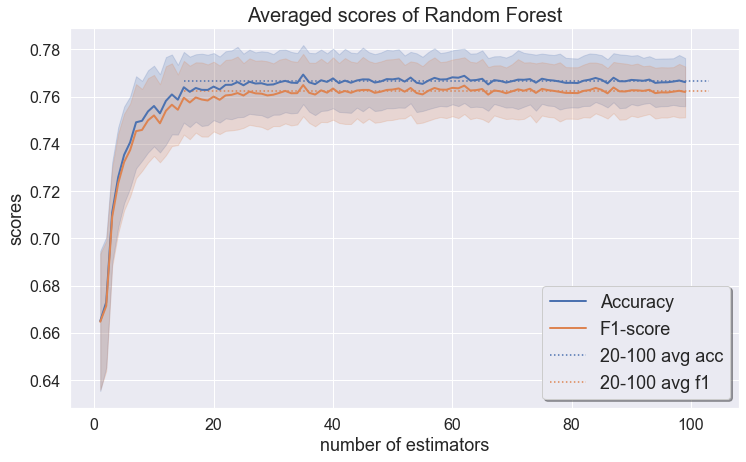

In [16]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(np.arange(1, 100, 1), forest_accuracy.mean(axis=0), lw=2, label='Accuracy',
        color=sns.color_palette()[0])
ax.hlines(forest_accuracy[:,20:].mean(), 15, 103, 
         linestyle=':', color=sns.color_palette()[0],
         label='20-100 avg acc')
ax.fill_between(np.arange(1, 100, 1), forest_accuracy.mean(axis=0) - forest_accuracy.std(axis=0), 
                forest_accuracy.mean(axis=0) + forest_accuracy.std(axis=0), alpha=0.2,
                color=sns.color_palette()[0])
ax.plot(np.arange(1, 100, 1), forest_f1_score.mean(axis=0), lw=2, label='F1-score',
        color=sns.color_palette()[1])
ax.hlines(forest_f1_score[:,20:].mean(), 15, 103, 
         linestyle=':', color=sns.color_palette()[1],
         label='20-100 avg f1')
ax.fill_between(np.arange(1, 100, 1), forest_f1_score.mean(axis=0) - forest_f1_score.std(axis=0), 
                forest_f1_score.mean(axis=0) + forest_f1_score.std(axis=0), alpha=0.2,
                color=sns.color_palette()[1])

ax.set_xlabel(r'number of estimators', fontsize=18)
ax.set_ylabel(r'scores', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.legend(shadow = True, fontsize=18, loc='lower right')
ax.set_title(r"Averaged scores of Random Forest",
             fontsize=20)
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

As expected, we can clearly see an incresing tendecy in mectrics with train batch size increse, run to run variance decreases on the other hand. So, the more objects we have, the better models approximate dependencies and the better classification works.

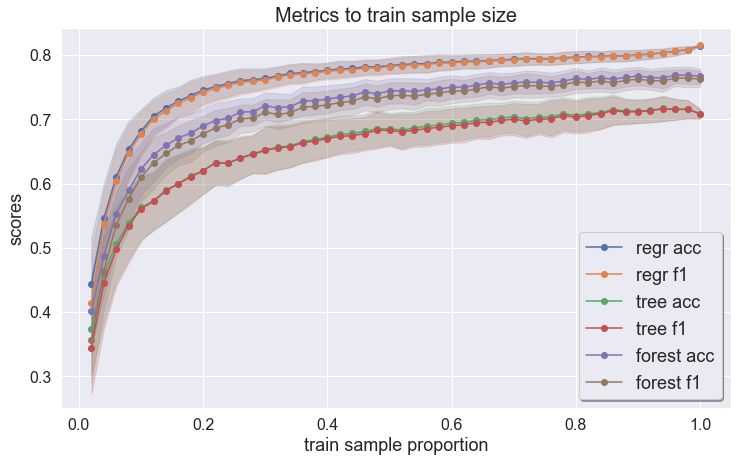

In [20]:
avg_k = 100
k_splits = 50 # more splits? - why not
# do what is required avg_k times and average to make plot less random
# calculate standard deviation between runs to also plot it

regressor = LogisticRegression(multi_class='multinomial', 
                          solver='saga', tol=1e-3, max_iter=500, 
                          C=best_regr_C, penalty=best_regr_penalty)
regr = Pipeline([('scaler', StandardScaler()),
                 ('regressor', regressor)])

tree = DecisionTreeClassifier(max_depth=best_tree_depth, 
                              criterion=best_tree_criterion)

forest = RandomForestClassifier(n_estimators=30, max_depth=8, max_features=0.36)

clfs = [regr, tree, forest]
titles = ['regr', 'tree', 'forest']

accuracies = [[]] * avg_k
f1_scores = [[]] * avg_k

for n in range(avg_k):
    all_indices = np.arange(1, X_train.shape[0])
    random.shuffle(all_indices)
    batches_inds = np.array_split(all_indices, k_splits)
    
    temp_acc = [[],[],[]]
    temp_f1 = [[],[],[]]
    
    for i in range(k_splits):
        
        temp_X = X_train[np.concatenate(batches_inds[:i+1])]
        temp_y = y_train[np.concatenate(batches_inds[:i+1])]
        temp_scaler = StandardScaler().fit(temp_X)

        for j in range(len(clfs)):

            clfs[j].fit(temp_X, temp_y)
            pred_labels = clfs[j].predict(X_test)
            
            temp_acc[j].append(accuracy_score(y_test, pred_labels))
            temp_f1[j].append(f1_score(y_test, pred_labels, average="macro"))

    accuracies[n] = temp_acc
    f1_scores[n] = temp_f1

accuracies, f1_scores = np.array(accuracies), np.array(f1_scores)

accuracies_std = accuracies.std(axis=0)
f1_scores_std = f1_scores.std(axis=0)
accuracies_mean = accuracies.mean(axis=0)
f1_scores_mean = f1_scores.mean(axis=0)

plt.figure(figsize=(12,7))

for i in range(3):
    plt.plot(np.arange(0.02, 1.02, 0.02), accuracies_mean[i], marker='o',
             label=f'{titles[i]} acc',
            color=sns.color_palette()[2*i])
    plt.fill_between(np.arange(0.02, 1.02, 0.02), accuracies_mean[i] - accuracies_std[i], 
                accuracies_mean[i] + accuracies_std[i], alpha=0.2,
                color=sns.color_palette()[2*i])
    
    plt.plot(np.arange(0.02, 1.02, 0.02), f1_scores_mean[i], marker='o',
             label=f'{titles[i]} f1',
            color=sns.color_palette()[2*i+1])
    plt.fill_between(np.arange(0.02, 1.02, 0.02), f1_scores_mean[i] - f1_scores_std[i], 
                f1_scores_mean[i] + f1_scores_std[i], alpha=0.2,
                color=sns.color_palette()[2*i+1])
    

plt.xlabel(r'train sample proportion', fontsize=18)
plt.ylabel(r'scores', fontsize=18)
plt.ylim(bottom=0.25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(shadow = True, fontsize=18, loc='lower right')
plt.title('Metrics to train sample size', fontsize=20)

plt.show()